# Generating dataset 


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
from torchvision import datasets
import copy
import os
from tqdm.notebook import tqdm
import numpy as np 
np.set_printoptions(suppress=True)

import random

# Create mini-mnist C dataset for mini testing
get 1000 samples from each corruption dataset * 15 corruptions = 15000 sample images and labels

In [2]:
random.seed(10)
randomlist = random.sample(range(0, 10000), 1000)
# randomlist = [i for i in range(1000)]
# print(randomlist)
CORRUPTION_TYPES = ['identity', 
         'shot_noise', 'impulse_noise','glass_blur','motion_blur',
         'shear', 'scale',  'rotate',  'brightness',  'translate',
         'stripe', 'fog','spatter','dotted_line', 'zigzag',
         'canny_edges']

path_root = '../data/MNIST_C'
# clist = os.listdir(path_root)
ilist = []
llist = []
for corruption in CORRUPTION_TYPES:
    path_images = os.path.join(path_root, corruption, 'test_images.npy')
    path_labels = os.path.join(path_root, corruption, 'test_labels.npy')
    images = np.load(path_images)
    labels = np.load(path_labels)
    
    ilist.append(images[randomlist])
    llist.append(labels[randomlist])

selected_images = np.vstack(ilist)
selected_labels = np.hstack(llist)
print(selected_images.shape) #(16000, 28, 28, 1)
print(selected_labels.shape) #(16000,)

(16000, 28, 28, 1)
(16000,)


In [3]:
#tranform to tensorized images (int8->float32,0-1) & one-hot vector for labels
transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
selected_images_tensorized = torch.stack([T.ToTensor()(im) for im in selected_images])
selected_labels_tensorized = torch.stack([transform_tohot(label) for label in selected_labels])
print(selected_images_tensorized.shape) #torch.Size([16000, 1, 28, 28])
print(selected_labels_tensorized.shape) #torch.Size([16000, 10])

torch.Size([16000, 1, 28, 28])
torch.Size([16000, 10])


In [4]:
# save tensorized dataset
path_save = os.path.join(path_root, 'mnistc_mini.pt')
torch.save((selected_images_tensorized, selected_labels_tensorized), path_save)
print('dataset saved to disk')

dataset saved to disk


In [31]:
##################################
# shuffle the order original mnistc (for visualization)
############################
# # print(randomlist)
# CORRUPTION_TYPES = ['identity', 
#          'shot_noise', 'impulse_noise','glass_blur','motion_blur',
#          'shear', 'scale',  'rotate',  'brightness',  'translate',
#          'stripe', 'fog','spatter','dotted_line', 'zigzag',
#          'canny_edges']
# CORRUPTION_TYPES = ['impulse_noise']

# path_root = '../data/MNIST_C'
# # clist = os.listdir(path_root)
# for corruption in CORRUPTION_TYPES:
#     randomlist = random.sample(range(0, 10000), 10000)

#     path_images = os.path.join(path_root, corruption, 'test_images.npy')
#     path_labels = os.path.join(path_root, corruption, 'test_labels.npy')
#     path_images_shuffled = os.path.join(path_root, corruption, 'test_images_shuffled.npy')
#     path_labels_shuffled = os.path.join(path_root, corruption, 'test_labels_shuffled.npy')
    
#     images = np.load(path_images)[randomlist]
#     labels = np.load(path_labels)[randomlist]
    
#     np.save(path_images_shuffled, images)
#     np.save(path_labels_shuffled, labels)

# print('shuffled images and labels are saved')

shuffled images and labels are saved


# Create dataset from experimental stimuli

In [67]:
import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as T

%matplotlib inline 
import matplotlib.pyplot as plt

# set the directory where the PNG images are stored
expname ='exp2' # 'exp1'


# create an empty list to store the images as NumPy arrays
images_array = []
labels_array = []
indices = []
files = []

if expname=='exp1':
    directory = '../stimuli/stimuli-exp1-step5'
    corruptions = ['impulse_noise', 'spatter', 'glass_blur', 'fog', 
     'motion_blur', 'dotted_line', 'zigzag', 'shot_noise']
elif expname=='exp2':
    directory = '../stimuli/stimuli-exp2-step5'
    corruptions = ['impulse_noise','zigzag', 'fog',  'glass_blur', 
     'motion_blur', 'shot_noise']
# loop through all the files in the directory
for corruption in corruptions:
    for filename in os.listdir(directory):

        if filename.endswith('.png') and filename.startswith(corruption):
            pass
        else:
            continue
        files.append(filename)

        # get corruption name
#         cname = None
#         for corruption in corruptions:
#             if corruption in filename:
#                 cname = corruption

#         assert cname is not None

        # get trial idx
        if expname =='exp1':
            idx = int(filename.split('.')[0].split('_')[-3][1:])
        elif expname =='exp2':
            idx = int(filename.split('.')[0].split('_')[-4][1:])
    #     gt = int(filename.split('.')[0].split('_')[-2][-1])
        indices.append(idx)
        path_images = os.path.join('../../data/MNIST_C', corruption, 'test_images.npy')
        path_labels = os.path.join('../../data/MNIST_C', corruption, 'test_labels.npy')
        images = np.load(path_images)
        labels = np.load(path_labels)   


        # get images and labels
        images_array.append(images[idx])
        labels_array.append(labels[idx])

# convert the list of arrays to a single NumPy array
images_array = np.array(images_array)
labels_array = np.array(labels_array)

In [68]:
#tranform to tensorized images (int8->float32,0-1) & one-hot vector for labels
transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
images_tensorized = torch.stack([T.ToTensor()(im) for im in images_array])
labels_tensorized = torch.stack([transform_tohot(label) for label in labels_array])
print(images_tensorized.shape) #torch.Size([16000, 1, 28, 28])
print(labels_tensorized.shape) #torch.Size([16000, 10])

torch.Size([120, 1, 28, 28])
torch.Size([120, 10])


In [69]:
# save tensorized dataset

path_save = os.path.join('../../data/MNIST_C', f'mnistc_{expname}.pt')
torch.save((images_tensorized, labels_tensorized), path_save)
np.save(f'../../data/MNIST_C/minstc_{expname}_filename.npy', np.array(files))
print('dataset saved to disk')

dataset saved to disk


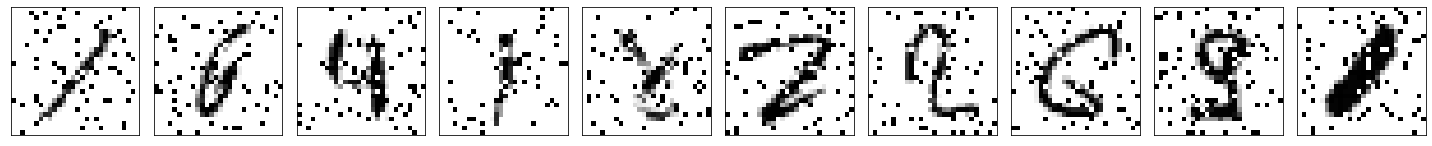

[tensor(1), tensor(6), tensor(4), tensor(1), tensor(8), tensor(2), tensor(2), tensor(6), tensor(9), tensor(1)]
['impulse_noise_t4951_g1_c2_o8.png', 'impulse_noise_t3344_g6_c2_o8.png', 'impulse_noise_t3410_g4_c5_o9.png', 'impulse_noise_t6628_g1_c3_o9.png', 'impulse_noise_t6625_g8_c1_o3.png', 'impulse_noise_t924_g2_c7_o3.png', 'impulse_noise_t4248_g2_c8_o9.png', 'impulse_noise_t3853_g6_c8_o0.png', 'impulse_noise_t3926_g9_c8_o3.png', 'impulse_noise_t7856_g1_c2_o8.png']


In [71]:
# visualize images
def plot(imgs, num_rows = 1, with_orig=False, row_title=None, cmap='gray', **imshow_kwargs):
#     if not isinstance(imgs, list):
#         raise ValueError('input images should be list form')

    num_cols = int(len(imgs)/num_rows) + (len(imgs)%num_rows > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     import pdb; pdb.set_trace()
    for row_idx in range(num_rows):
        for col_idx, img in enumerate(imgs[row_idx*num_cols:(row_idx+1)*num_cols]):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap=cmap, vmin=0, vmax=1,  **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()
#     plt.savefig('image-sample-resolution.pdf', bbox_inches='tight', dpi=300)
    plt.show()

    
plt.rcParams["figure.figsize"] = (20,3)
istart=10
iend = 20# 90 #152
plottedimgs = [torch.movedim(images_tensorized[i], 0 ,-1) for i in range(istart, iend)]
plot(plottedimgs, num_rows=1, cmap='gray_r')

print([l.argmax() for l in labels_tensorized[istart: iend]])
print([f for f in files[istart: iend]])

In [31]:
##################################
# shuffle the order original mnistc (for visualization)
############################
# # print(randomlist)
# CORRUPTION_TYPES = ['identity', 
#          'shot_noise', 'impulse_noise','glass_blur','motion_blur',
#          'shear', 'scale',  'rotate',  'brightness',  'translate',
#          'stripe', 'fog','spatter','dotted_line', 'zigzag',
#          'canny_edges']
# CORRUPTION_TYPES = ['impulse_noise']

# path_root = '../data/MNIST_C'
# # clist = os.listdir(path_root)
# for corruption in CORRUPTION_TYPES:
#     randomlist = random.sample(range(0, 10000), 10000)

#     path_images = os.path.join(path_root, corruption, 'test_images.npy')
#     path_labels = os.path.join(path_root, corruption, 'test_labels.npy')
#     path_images_shuffled = os.path.join(path_root, corruption, 'test_images_shuffled.npy')
#     path_labels_shuffled = os.path.join(path_root, corruption, 'test_labels_shuffled.npy')
    
#     images = np.load(path_images)[randomlist]
#     labels = np.load(path_labels)[randomlist]
    
#     np.save(path_images_shuffled, images)
#     np.save(path_labels_shuffled, labels)

# print('shuffled images and labels are saved')

shuffled images and labels are saved
